# Flights Dataset
## by Faisal AlDhuwayhi

## Preliminary Wrangling

> This dataset reports flights of California state, of the year of 2019. Flights that are going into California or going outside of California. Including variables like destinations, arrival and departure delays, and more other features.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Loading in your dataset and figuring its properties.

In [3]:
# import the data
import os

flights = pd.DataFrame()
for month in os.listdir('./dataset_flights_2019/California/'):
    if month != '.DS_Store':
        temp_df = pd.read_csv('./dataset_flights_2019/California/'+month)
        flights = flights.append(temp_df, ignore_index=True)

In [4]:
# drop a defective columns 
flights.drop('Unnamed: 17', axis=1, inplace=True)

In [5]:
# let's look at the size of the dataset
flights.shape

(1379233, 17)

In [6]:
# have a general look at it 
flights.head()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_CITY_NAME,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
0,2,4,1,1,"San Diego, CA","Las Vegas, NV",650,638.0,-12.0,815,748.0,-27.0,0.0,NaN,85.0,70.0,258.0
1,2,4,2,2,"San Diego, CA","Las Vegas, NV",650,641.0,-9.0,815,800.0,-15.0,0.0,NaN,85.0,79.0,258.0
2,2,4,3,3,"San Diego, CA","Las Vegas, NV",650,645.0,-5.0,815,811.0,-4.0,0.0,NaN,85.0,86.0,258.0
3,2,4,4,4,"San Diego, CA","Las Vegas, NV",650,644.0,-6.0,815,756.0,-19.0,0.0,NaN,85.0,72.0,258.0
4,2,4,5,5,"San Diego, CA","Las Vegas, NV",650,651.0,1.0,815,814.0,-1.0,0.0,NaN,85.0,83.0,258.0


In [7]:
# properties of the dataset
flights.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379233 entries, 0 to 1379232
Data columns (total 17 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   QUARTER              1379233 non-null  int64  
 1   MONTH                1379233 non-null  int64  
 2   DAY_OF_MONTH         1379233 non-null  int64  
 3   DAY_OF_WEEK          1379233 non-null  int64  
 4   ORIGIN_CITY_NAME     1379233 non-null  object 
 5   DEST_CITY_NAME       1379233 non-null  object 
 6   CRS_DEP_TIME         1379233 non-null  int64  
 7   DEP_TIME             1358922 non-null  float64
 8   DEP_DELAY            1358921 non-null  float64
 9   CRS_ARR_TIME         1379233 non-null  int64  
 10  ARR_TIME             1357678 non-null  float64
 11  ARR_DELAY            1355040 non-null  float64
 12  CANCELLED            1379233 non-null  float64
 13  CANCELLATION_CODE    20859 non-null    object 
 14  CRS_ELAPSED_TIME     1379233 non-null  float64
 15

In [8]:
# we need to clean some issue on the data
flights_master = flights.copy()

In [9]:
# check duplicates and remove it
print("Before removing duplicates:", flights_master.duplicated().sum())

flights_master = flights_master[~flights_master.duplicated()]

print("After removing duplicates:", flights_master.duplicated().sum())

Before removing duplicates: 6
After removing duplicates: 0


In [10]:
# make all the columns names as lowercase to make the indexing easier
flights_master.columns = [column.lower() for column in flights_master.columns.tolist()]
flights_master.columns

Index(['quarter', 'month', 'day_of_month', 'day_of_week', 'origin_city_name',
       'dest_city_name', 'crs_dep_time', 'dep_time', 'dep_delay',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'crs_elapsed_time', 'actual_elapsed_time',
       'distance'],
      dtype='object')

In [11]:
# split the city and the state in different columns

# origin state and city
origin_city_state = flights_master.origin_city_name.str.split(', ')
flights_master['origin_city_name'] = origin_city_state.apply(lambda x : x[0])
origin_state_name = origin_city_state.apply(lambda x : x[1])

index = flights_master.columns.get_loc("origin_city_name")
flights_master.insert(loc=index+1, column='origin_state_name', value=origin_state_name)


# destination state and city
dest_city_state = flights_master.dest_city_name.str.split(', ')
flights_master['dest_city_name'] = dest_city_state.apply(lambda x : x[0])
dest_state_name = dest_city_state.apply(lambda x : x[1])

index = flights_master.columns.get_loc("dest_city_name")
flights_master.insert(loc=index+1, column='dest_state_name', value=dest_state_name)

In [12]:
flights_master.sample()

,quarter,month,day_of_month,day_of_week,origin_city_name,origin_state_name,dest_city_name,dest_state_name,crs_dep_time,dep_time,dep_delay,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,crs_elapsed_time,actual_elapsed_time,distance
595671,4,11,7,4,Sacramento,CA,Seattle,WA,1750,1746.0,-4.0,2010,1934.0,-36.0,0.0,NaN,140.0,108.0,605.0


In [13]:
# change the cancellation_code to the real variable and make it as a category variable

# this conversion is from the documentation of the dataset
conversions = {'A' : 'Carrier', 'B' : 'Weather', 'C' : 'National Air System', 'D' : 'Security'}

flights_master['cancellation_code'] = flights_master.cancellation_code.apply(lambda x : conversions.get(x, np.nan))
flights_master['cancellation_code'] = flights_master['cancellation_code'].astype('category')

In [14]:
flights_master.cancellation_code.value_counts()

Carrier                10608
Weather                 7127
National Air System     3114
Security                   8
Name: cancellation_code, dtype: int64

In [15]:
# change of day_of_week to the names of the days and make it categorical
import calendar

flights_master['day_of_week'] = flights_master.day_of_week.apply(lambda x : calendar.day_name[x-1])

categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dtype = pd.api.types.CategoricalDtype(categories=categories, ordered=True)
flights_master['day_of_week'] = flights_master['day_of_week'].astype(dtype)

In [16]:
flights_master.day_of_week.value_counts()

Monday       206100
Friday       205623
Thursday     203987
Tuesday      201032
Wednesday    200310
Sunday       194952
Saturday     167223
Name: day_of_week, dtype: int64

In [17]:
# change of month numbers to the names of the months and make it categorical
flights_master['month'] = flights_master.month.apply(lambda x : calendar.month_name[x])

categories = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
              'November', 'December']
dtype = pd.api.types.CategoricalDtype(categories=categories, ordered=True)
flights_master['month'] = flights_master['month'].astype(dtype)

In [18]:
flights_master.month.value_counts()

August       125957
July         124471
June         118327
October      117693
December     116963
May          116042
March        114859
September    112764
April        112191
November     111026
January      109798
February      99136
Name: month, dtype: int64

In [19]:
# change the quarters to be categorical variable
flights_master['quarter'] = flights_master['quarter'].astype(str)
conversions = {'1' : 'First', '2' : 'Second', '3' : 'Third', '4' : 'Forth'}
flights_master['quarter'] = flights_master.quarter.apply(lambda x : conversions[x])

categories = ['First', 'Second', 'Third', 'Forth']
dtype = pd.api.types.CategoricalDtype(categories=categories, ordered=True)
flights_master['quarter'] = flights_master['quarter'].astype(dtype)

In [20]:
flights_master.quarter.value_counts()

Third     363192
Second    346560
Forth     345682
First     323793
Name: quarter, dtype: int64

In [21]:
# Remove the nan values
flights_master.drop(flights_master[flights_master.actual_elapsed_time.isna()].index, inplace=True)

In [22]:
# convert the types of some variables to integer
flights_master['dep_time'] = flights_master.dep_time.astype(int)
flights_master['dep_delay'] = flights_master.dep_delay.astype(int)
flights_master['arr_time'] = flights_master.arr_time.astype(int)
flights_master['arr_delay'] = flights_master.arr_delay.astype(int)
flights_master['crs_elapsed_time'] = flights_master.crs_elapsed_time.astype(int)
flights_master['actual_elapsed_time'] = flights_master.actual_elapsed_time.astype(int)
flights_master['cancelled'] = flights_master.cancelled.astype(int)

In [23]:
flights_master.dtypes

quarter                category
month                  category
day_of_month              int64
day_of_week            category
origin_city_name         object
origin_state_name        object
dest_city_name           object
dest_state_name          object
crs_dep_time              int64
dep_time                  int64
dep_delay                 int64
crs_arr_time              int64
arr_time                  int64
arr_delay                 int64
cancelled                 int64
cancellation_code      category
crs_elapsed_time          int64
actual_elapsed_time       int64
distance                float64
dtype: object

In [24]:
# convert hhmm format to time format hh:mm:ss, and also keeping the original
def str_to_time(time):
    time = str(time)
    new_time = ''
    if len(time) == 1:
        new_time = "00:0{}:00".format(time)
    elif len(time) == 2:
        new_time = "00:{}:00".format(time)
    elif len(time) == 3:
        timeh = time[0]
        timem = time[1:]
        new_time = "0{}:{}:00".format(timeh, timem)
    elif len(time) == 4:
        if time != '2400':
            timeh = time[0:2]
            timem = time[2:]
            new_time = "{}:{}:00".format(timeh, timem)
        else:
            new_time = "00:00:00"
        
    return new_time

In [25]:
crs_dep_time_new = flights_master.crs_dep_time.apply(lambda x : str_to_time(x))
dep_time_new = flights_master.dep_time.apply(lambda x : str_to_time(x))
crs_arr_time_new = flights_master.crs_arr_time.apply(lambda x : str_to_time(x))
arr_time_new = flights_master.arr_time.apply(lambda x : str_to_time(x))

index = flights_master.columns.get_loc("crs_dep_time")
flights_master.insert(loc=index+1, column='crs_dep_time_new', value=crs_dep_time_new)

index = flights_master.columns.get_loc("dep_time")
flights_master.insert(loc=index+1, column='dep_time_new', value=dep_time_new)

index = flights_master.columns.get_loc("crs_arr_time")
flights_master.insert(loc=index+1, column='crs_arr_time_new', value=crs_arr_time_new)

index = flights_master.columns.get_loc("arr_time")
flights_master.insert(loc=index+1, column='arr_time_new', value=arr_time_new)

In [26]:
# reset the row index
flights_master.index = range(flights_master.shape[0])

Now, let's have a look at the cleaned data:

In [27]:
# have a general look at it 
flights_master.head()

,quarter,month,day_of_month,day_of_week,origin_city_name,origin_state_name,dest_city_name,dest_state_name,crs_dep_time,crs_dep_time_new,...,crs_arr_time,crs_arr_time_new,arr_time,arr_time_new,arr_delay,cancelled,cancellation_code,crs_elapsed_time,actual_elapsed_time,distance
0,Second,April,1,Monday,San Diego,CA,Las Vegas,NV,650,06:50:00,...,815,08:15:00,748,07:48:00,-27,0,NaN,85,70,258.0
1,Second,April,2,Tuesday,San Diego,CA,Las Vegas,NV,650,06:50:00,...,815,08:15:00,800,08:00:00,-15,0,NaN,85,79,258.0
2,Second,April,3,Wednesday,San Diego,CA,Las Vegas,NV,650,06:50:00,...,815,08:15:00,811,08:11:00,-4,0,NaN,85,86,258.0
3,Second,April,4,Thursday,San Diego,CA,Las Vegas,NV,650,06:50:00,...,815,08:15:00,756,07:56:00,-19,0,NaN,85,72,258.0
4,Second,April,5,Friday,San Diego,CA,Las Vegas,NV,650,06:50:00,...,815,08:15:00,814,08:14:00,-1,0,NaN,85,83,258.0


In [28]:
# let's look at the size of the dataset
flights_master.shape

(1355036, 23)

In [29]:
flights_master.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1355036 entries, 0 to 1355035
Data columns (total 23 columns):
 #   Column               Non-Null Count    Dtype   
---  ------               --------------    -----   
 0   quarter              1355036 non-null  category
 1   month                1355036 non-null  category
 2   day_of_month         1355036 non-null  int64   
 3   day_of_week          1355036 non-null  category
 4   origin_city_name     1355036 non-null  object  
 5   origin_state_name    1355036 non-null  object  
 6   dest_city_name       1355036 non-null  object  
 7   dest_state_name      1355036 non-null  object  
 8   crs_dep_time         1355036 non-null  int64   
 9   crs_dep_time_new     1355036 non-null  object  
 10  dep_time             1355036 non-null  int64   
 11  dep_time_new         1355036 non-null  object  
 12  dep_delay            1355036 non-null  int64   
 13  crs_arr_time         1355036 non-null  int64   
 14  crs_arr_time_new     1355036 non-n

### What is the structure of your dataset?

> The dataset is structured as the following:
- Quarter of the year
- Month of the flight
- Day of the month 
- Day of the week
- The origin city and state of the flight
- The destination city and state of the flight
- Scheduled and actual departure time
- Departure delay, in minutes
- Scheduled and actual arrival time
- Arrival delay, in minutes
- Was the flight cancelled? If yes, what is the reason of cancellation?
- Scheduled and actual elapsed time
- Distance of the flight

### What is/are the main feature(s) of interest in your dataset?

> - Quarter of the year
- Day of the month
- Day of the week
- Departure delay
- Arrival delay
- The destination city and state of the flight


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> - Scheduled and actual elapsed time
- Distance of the flight
- Scheduled and actual departure time
- Scheduled and actual arrival time
- The origin city and state of the flight

## Univariate Exploration

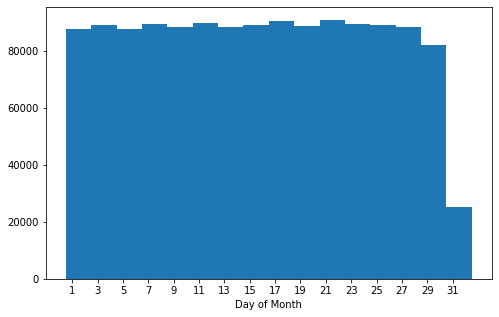

In [30]:
# Histogram plot
plt.figure(figsize=[8,5])
bin_edges = np.arange(0.5, 31.5+2, 2)
plt.hist(data = flights_master, x = 'day_of_month', bins = bin_edges)
plt.xlabel('Day of Month')
plt.xticks(np.arange(1, 31+2, 2));

**Observation:** From the plot we can observe that there are less flights in the last days of the month.

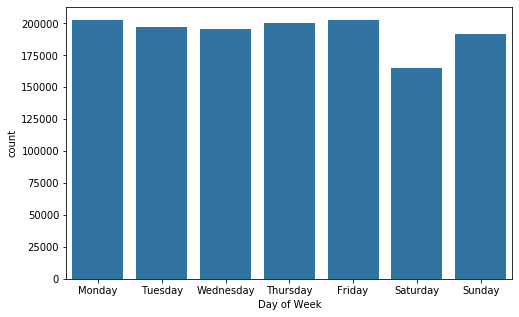

In [31]:
# Bar plot
plt.figure(figsize=[8,5])
base_color = sb.color_palette()[0]
sb.countplot(data = flights_master, x = 'day_of_week', color = base_color)
plt.xlabel('Day of Week');

**Observation:** We see that the weekend days have the least flights over the workdays.

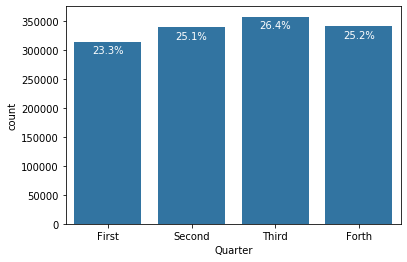

In [32]:
# Bar plot
base_color = sb.color_palette()[0]
sb.countplot(data = flights_master, x = 'quarter', color = base_color)
plt.xlabel('Quarter');


# add annotations
n_points = flights_master.shape[0]
quarter_counts = flights_master['quarter'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = quarter_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-20000, pct_string, ha = 'center', color = 'w')

**Observation:** We conclude that the second and the third quarters of the year, have the heightest ratio of flights. With slight differences from others. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> For the day of week of the flights, it appears the weekend days have less flights than the workdays. Which is a little bit unexpected. Since we expect to have more flights because they're relaxing days. But seems that there is so much work flights in the workdays of the week.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I need to perform some adjustments to have more tidy structured data and make the data easier to interpret and understand:
- I have changed the type of the quarter of the year, day of the month and day of the week to categorical.
- I have splitted the origin and destination of the flight from the form (city, state) in one variable, to put them in two different variables.
- I have conveted the format of the time from (hhmm) format, with bad recording to the entries, to the normal format (HH:MM:SS).

## Bivariate Exploration

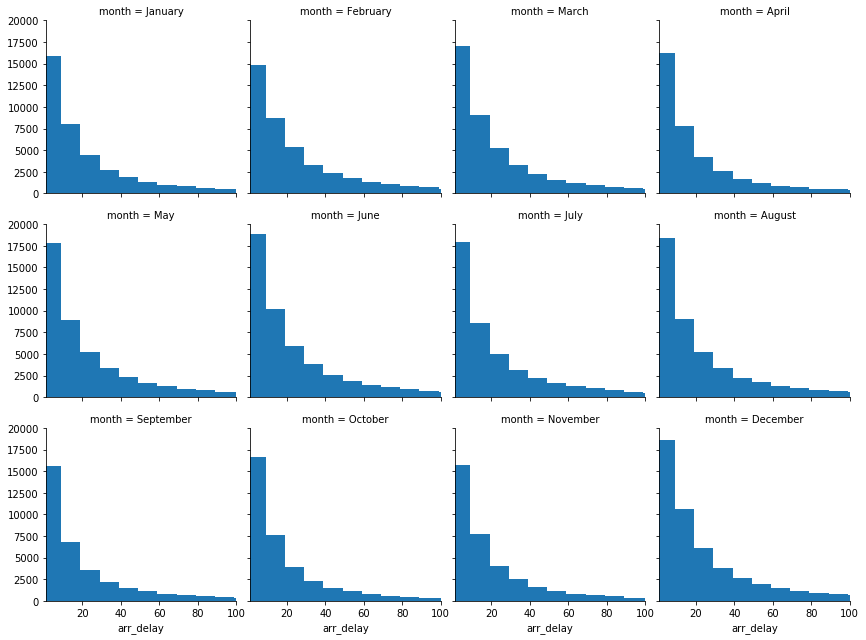

In [33]:
# Faceting
bin_edges = np.arange(flights_master.arr_delay.min(), flights_master.arr_delay.max()+10, 10)
g = sb.FacetGrid(data = flights_master, col = 'month', col_wrap = 4)
g.map(plt.hist, 'arr_delay', bins = bin_edges)
plt.xlim(1,100)
plt.ylim(0,20000);

**Observation:** We conclude that June and December have more delays in their flights than the others.

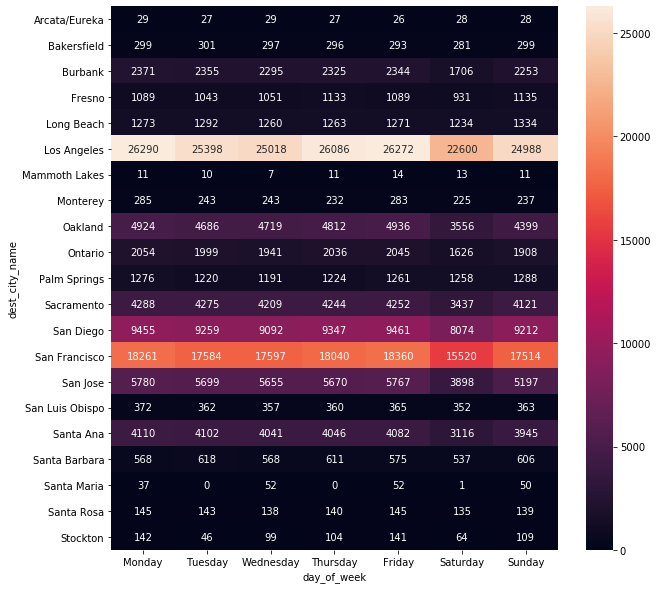

In [34]:
# Heat map
plt.figure(figsize=[10,10])
# taking the California destination of the flights 
toca_flights_master = flights_master[(flights_master.dest_state_name == 'CA') & 
                                  (flights_master.origin_state_name != 'CA')]
ct_counts = toca_flights_master.groupby(['day_of_week', 'dest_city_name']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'dest_city_name', columns = 'day_of_week', values = 'count')

sb.heatmap(ct_counts, annot = True, fmt = 'd');

**Observation:** We can see that Los Angles city has the highest number of flights coming to it over the whole week from outside of California. Coming in second place San Francisco city. And San Diago with the third place.

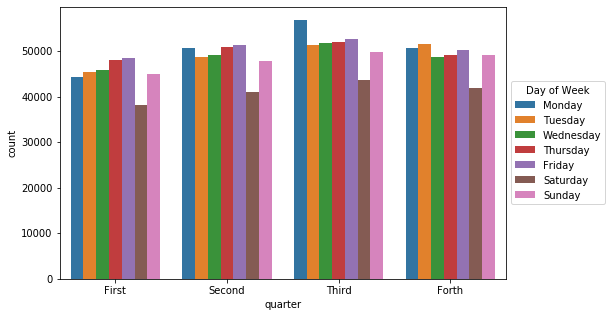

In [35]:
# Clustered Bar Chart
plt.figure(figsize=[8,5])
ax = sb.countplot(data = flights_master, x = 'quarter', hue = 'day_of_week')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'Day of Week');

**Observation:** We notice that friday is the most day that people having flights on in the first quarter of the year.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In the last plot we found saturday is the least day of the week in all the quarters of the year. there is also a quite consistent increse in the number of the flights between wednesday to friday. We figure out as well that Santa Maria city and Mammoth lakes have least number flights that are coming to it over the whole week.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No

## Multivariate Exploration

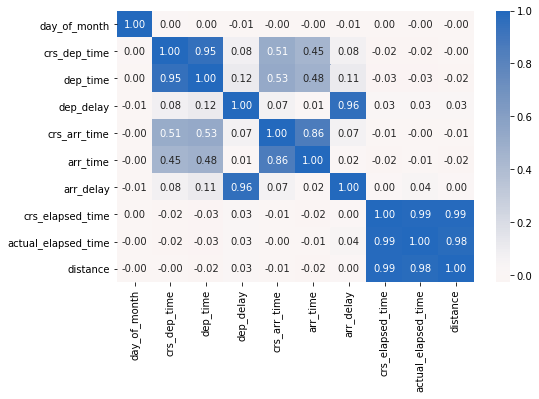

In [36]:
# Correlation Matrices
plt.figure(figsize=[8,5])
corr_flights_master = flights_master.corr().drop('cancelled', axis=0)
corr_flights_master = corr_flights_master.drop('cancelled', axis=1)
sb.heatmap(corr_flights_master, annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

**Observation:** We see that there is a high correlation between the scheduled and the actual times, which is expected. But more noticeable thing that there is no correlation between the day of the month of the flight and the other features. 

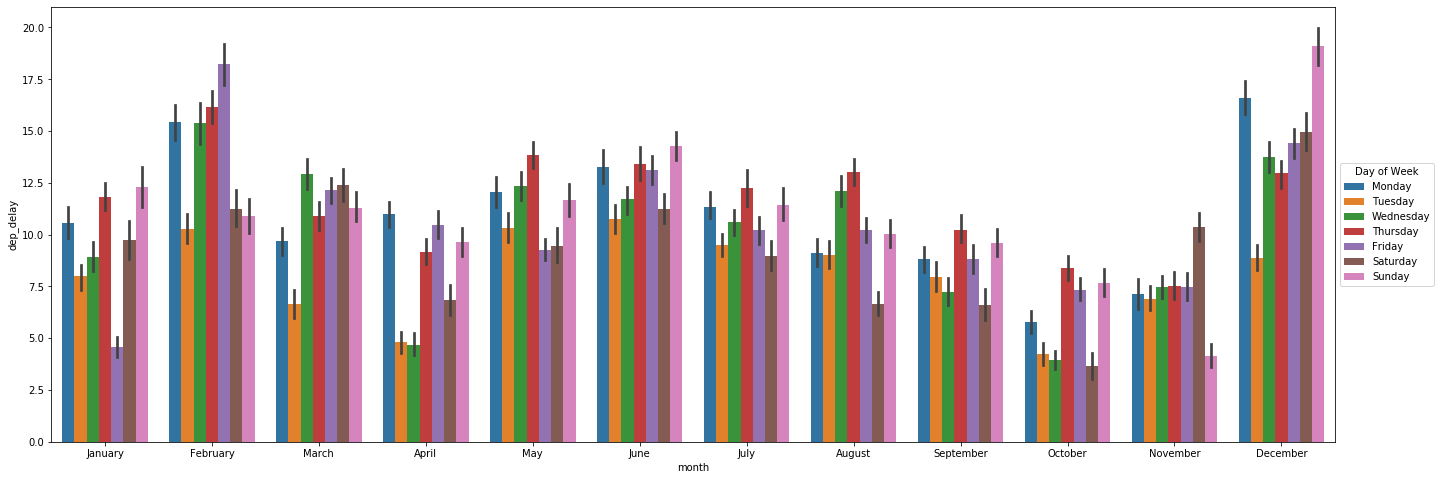

In [37]:
# Adapted clustered bar chart
plt.figure(figsize=[23,8])
ax = sb.barplot(data = flights_master, x = 'month', y = 'dep_delay', hue = 'day_of_week')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'Day of Week');

**Observation:** We can infer that february and december have the worst average departure time dely in general.

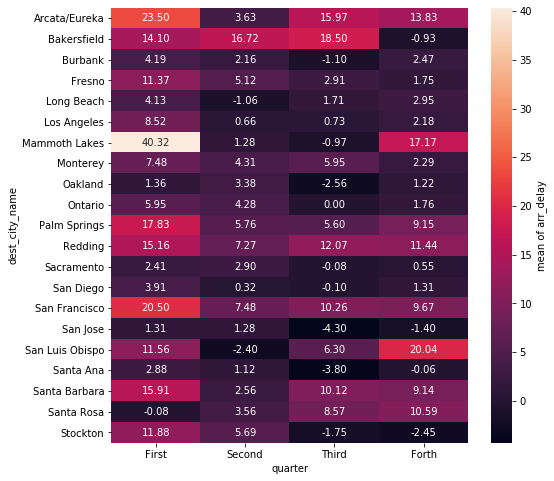

In [38]:
# Adapted heat map
plt.figure(figsize=[8,8])
# taking only the local flights
local_flights_master = flights_master[(flights_master.origin_state_name == 'CA') &
                                   (flights_master.dest_state_name == 'CA')]

cat_means = local_flights_master.groupby(['quarter', 'dest_city_name']).mean()['arr_delay']
cat_means = cat_means.reset_index(name = 'arr_delay_avg')
cat_means = cat_means.pivot(index = 'dest_city_name', columns = 'quarter',
                            values = 'arr_delay_avg')
sb.heatmap(cat_means, annot = True, fmt = '.2f',
           cbar_kws = {'label' : 'mean of arr_delay'});

**Observation:** For the first quarter, Mammoth lakes city appears to be the hightest average arrival time delay for destination city of local flights. and the same thing applied on Bakersfield for the second and third quarter. And it looks that San Luis Obispo city has the hightest average arrival time delay for the forth quarter.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> From the clustered bar chart we see that tuesdays usually have the least average departure time dely between the other days over the months. Also it looks like the second quarter have a best ratio of averages arrival time for all the citis for the local flights compared to the other quarters.

### Were there any interesting or surprising interactions between features?

> It looks like there isn't so much correlations or interesting correlations between the quantitative features. But we observed so much detailed information when utilize it with other the features.

In [46]:
# Storing the cleaned dataset in csv file for the slide_deck
flights_master.to_csv('slide_deck.csv', index=False)